<a href="https://colab.research.google.com/github/angiegp9010-prog/Tesis--Eficacia-del-cido-tranex-mico-en-hemorragia-obst-trica-/blob/main/script_hmemyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving base hmemyn v_f1.csv to base hmemyn v_f1 (7).csv

Análisis 1: Relación entre el uso de AT y el nivel de sangrado
nivel_sangrado  leve  moderado  severo
uso_at                                
0                  5         7       9
1                  7        21      13
p-valor de la prueba Chi-cuadrado: 0.4074


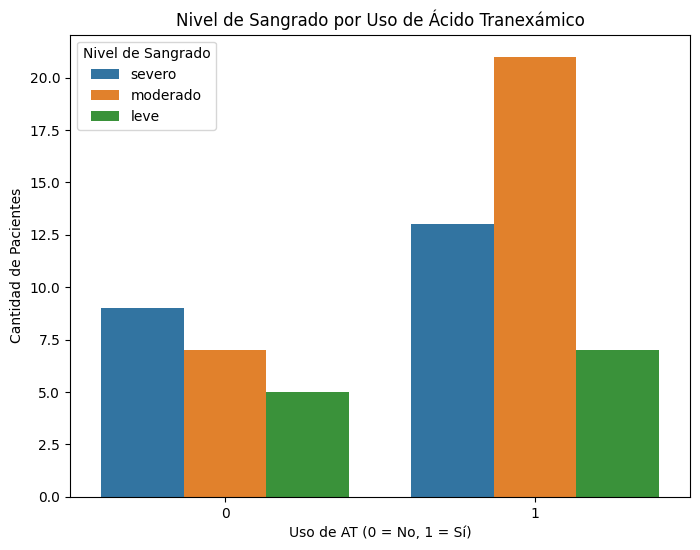


Análisis 2: Proporción de transfusiones masivas en el grupo con AT
Proporción de pacientes con AT que tuvieron transfusión masiva (>10 paquetes): 0.02

Análisis 3: Comparación de Hb pre vs. post en grupo con y sin AT

Prueba t de Student para Hb (pre vs. post) en el grupo con AT: p-valor = 0.0103
Prueba t de Student para Hb (pre vs. post) en el grupo sin AT: p-valor = 0.0000

Análisis 4: Comparación de sangrado entre nulíparas y multíparas
p-valor de la prueba t para sangrado (nulíparas vs. multíparas): 0.1888


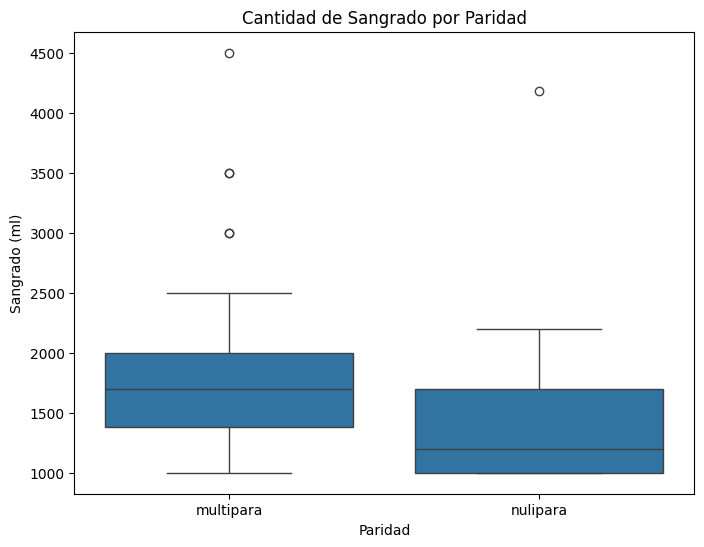


Análisis 5: Procedimientos quirúrgicos en el grupo con AT
Total de procedimientos quirúrgicos en el grupo con AT: 20


Saving base hmemyn v_f1.csv to base hmemyn v_f1 (8).csv

--- Análisis Complementario 1: Diferencia de Hb (AT vs. No AT) ---
p-valor de la prueba t para la diferencia de Hb: 0.0181


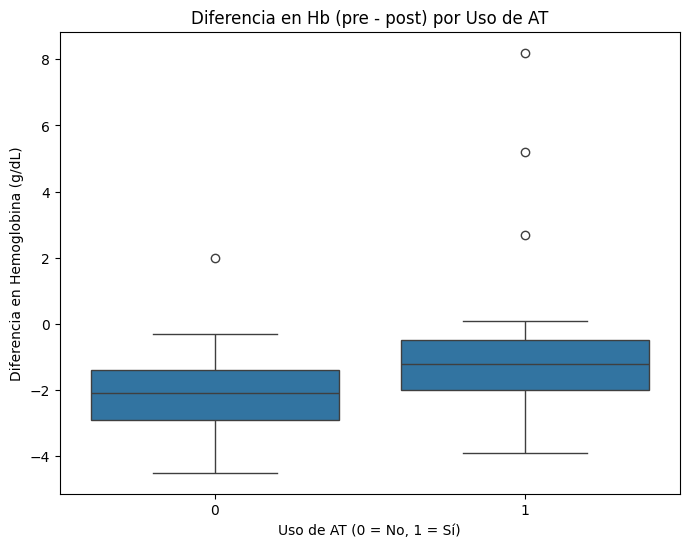


--- Análisis Complementario 2: Tasa de procedimientos quirúrgicos (AT vs. No AT) ---
procedimiento_quirurgico_bin   0   1
uso_at                              
0                             13   8
1                             21  20
p-valor de la prueba Chi-cuadrado: 0.5957


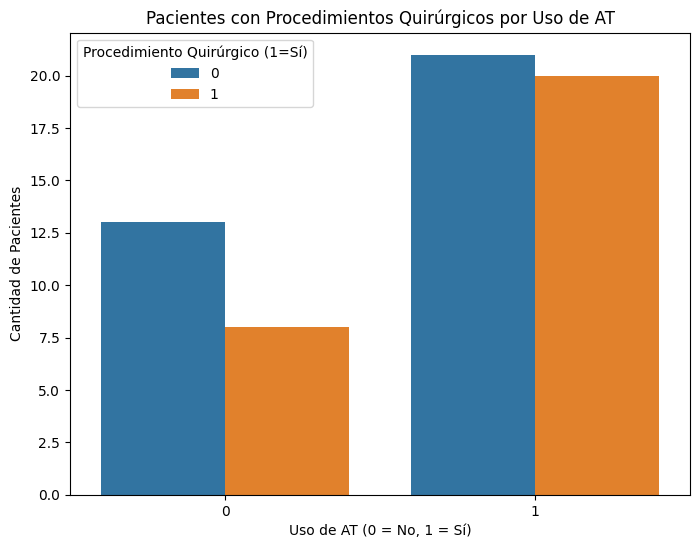


--- Análisis Complementario 3: Frecuencia de las causas de hemorragia ---
causas_hemo
au    46
dc    12
ap     4
Name: count, dtype: int64


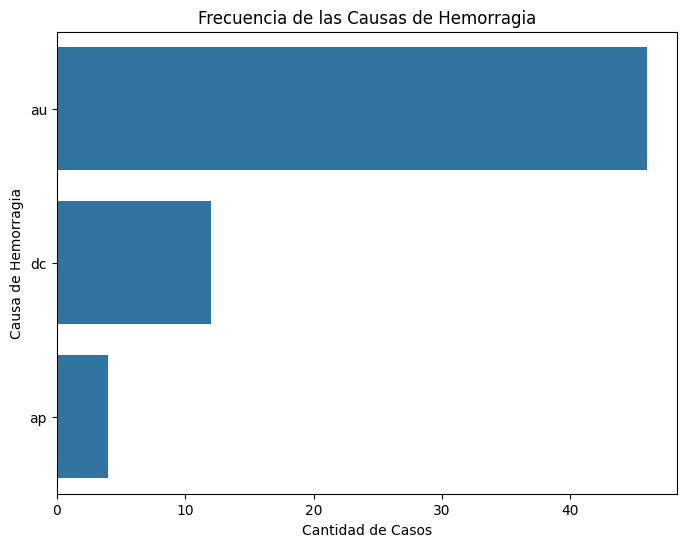

In [ ]:
#-----------------------------------------------------------------------------
# Script de Análisis para la Eficacia del Ácido Tranexámico
# Versión final corregida para la base de datos "base hmemyn v_f1.csv"
#-----------------------------------------------------------------------------

# 1. Configuración inicial y carga de librerías
#----------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import files

# Subir el archivo desde tu computadora a Google Colab.
# Al ejecutar esta celda, se te pedirá que selecciones el archivo.
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# --- ¡Línea corregida! ---
# Cargar el archivo con la codificación 'latin1' para manejar la 'ñ' y acentos.
df = pd.read_csv(file_name, encoding='latin1')

# 2. Preparación y limpieza de datos
#-----------------------------------------

# Renombrar columnas para facilitar el manejo, si es necesario.
df.rename(columns={
    'num_paq_transf': 'num_paq_transf',
    'nivel_sangrado': 'nivel_sangrado',
    'multiparas_nuliparas': 'multiparas_nuliparas',
    'factores_riesgo_bin': 'factores_riesgo_bin',
    'causas_hemo': 'causas_hemo',
    'sangrado_ml': 'sangrado_ml',
    'hb_pre': 'hb_pre',
    'hb_post': 'hb_post',
    'uso_at': 'uso_at',
    'proceso_quirurgico_bin': 'proceso_quirurgico_bin',
    'procedimiento_quirurgico': 'procedimiento_quirurgico',
    'tiempo_admin_min': 'tiempo_admin_min'
}, inplace=True)

# Limpiar y convertir tipos de datos si es necesario
for col in ['sangrado_ml', 'hb_pre', 'hb_post', 'tiempo_admin_min']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=True).astype(float)
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Crear variable binaria para transfusión masiva (>10 paquetes).
df['transfusion_masiva'] = (df['num_paq_transf'] > 10).astype(int)

# 3. Análisis para los objetivos
#------------------------------------------

# Objetivo 1: Eficacia del AT en la reducción del sangrado (Gráfico y Chi-cuadrado)
#------------------------------------------
print("\nAnálisis 1: Relación entre el uso de AT y el nivel de sangrado")
tabla_cruzada = pd.crosstab(df['uso_at'], df['nivel_sangrado'])
print(tabla_cruzada)
chi2, p_valor_chi2, _, _ = stats.chi2_contingency(tabla_cruzada)
print(f"p-valor de la prueba Chi-cuadrado: {p_valor_chi2:.4f}")

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='uso_at', hue='nivel_sangrado')
plt.title('Nivel de Sangrado por Uso de Ácido Tranexámico')
plt.xlabel('Uso de AT (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Nivel de Sangrado')
plt.show()

# Objetivo 2: Necesidad de transfusiones con el uso de AT (Transfusión masiva)
#------------------------------------------
print("\nAnálisis 2: Proporción de transfusiones masivas en el grupo con AT")
df_at = df[df['uso_at'] == 1]
proporcion_masiva_at = df_at['transfusion_masiva'].mean()
print(f"Proporción de pacientes con AT que tuvieron transfusión masiva (>10 paquetes): {proporcion_masiva_at:.2f}")

# Objetivo 3: Comparación de Hb pre vs. post
#------------------------------------------
print("\nAnálisis 3: Comparación de Hb pre vs. post en grupo con y sin AT")
hb_at_pre = df_at['hb_pre'].dropna()
hb_at_post = df_at['hb_post'].dropna()
if len(hb_at_pre) == len(hb_at_post) and len(hb_at_pre) > 0:
    t_stat_at, p_valor_at = stats.ttest_rel(hb_at_pre, hb_at_post)
    print(f"\nPrueba t de Student para Hb (pre vs. post) en el grupo con AT: p-valor = {p_valor_at:.4f}")
else:
    print("\nNo hay suficientes datos para la prueba t en el grupo con AT.")

df_no_at = df[df['uso_at'] == 0]
hb_no_at_pre = df_no_at['hb_pre'].dropna()
hb_no_at_post = df_no_at['hb_post'].dropna()
if len(hb_no_at_pre) == len(hb_no_at_post) and len(hb_no_at_pre) > 0:
    t_stat_no_at, p_valor_no_at = stats.ttest_rel(hb_no_at_pre, hb_no_at_post)
    print(f"Prueba t de Student para Hb (pre vs. post) en el grupo sin AT: p-valor = {p_valor_no_at:.4f}")
else:
    print("No hay suficientes datos para la prueba t en el grupo sin AT.")

# Objetivo 4: Sangrado en nulíparas vs. multíparas
#------------------------------------------
print("\nAnálisis 4: Comparación de sangrado entre nulíparas y multíparas")
sangrado_nuliparas = df[df['multiparas_nuliparas'] == 'nulipara']['sangrado_ml'].dropna()
sangrado_multiparas = df[df['multiparas_nuliparas'] == 'multipara']['sangrado_ml'].dropna()
t_stat_sangrado, p_valor_sangrado = stats.ttest_ind(sangrado_nuliparas, sangrado_multiparas, equal_var=False)
print(f"p-valor de la prueba t para sangrado (nulíparas vs. multíparas): {p_valor_sangrado:.4f}")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='multiparas_nuliparas', y='sangrado_ml')
plt.title('Cantidad de Sangrado por Paridad')
plt.xlabel('Paridad')
plt.ylabel('Sangrado (ml)')
plt.show()

# Objetivo 5: Procedimientos quirúrgicos con el uso de AT
#------------------------------------------
print("\nAnálisis 5: Procedimientos quirúrgicos en el grupo con AT")
conteo_procedimientos = df_at['procedimiento_quirurgico'].str.contains('histerectomia|bakry|ligadura', case=False).sum()
print(f"Total de procedimientos quirúrgicos en el grupo con AT: {conteo_procedimientos}")


#-----------------------------------------------------------------------------
# Script de Análisis con Complementos
#-----------------------------------------------------------------------------

# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from google.colab import files

# Subir el archivo de datos
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el archivo con codificación Latin-1 para evitar errores
try:
    df = pd.read_csv(file_name, encoding='latin1')
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='utf-8')

# 1. Limpieza y preparación de datos
#----------------------------------------------
# Limpiar y convertir tipos de datos
for col in ['sangrado_ml', 'hb_pre', 'hb_post', 'tiempo_admin_min']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.', regex=True).astype(float)
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir columnas a factores/categorías para el análisis
df['uso_at'] = df['uso_at'].astype('category')
df['nivel_sangrado'] = df['nivel_sangrado'].astype('category')

# Crear columnas de diferencia de Hb y de procedimiento quirúrgico
df['diferencia_hb'] = df['hb_pre'] - df['hb_post']
df['procedimiento_quirurgico_bin'] = df['procedimiento_quirurgico'].apply(
    lambda x: 1 if pd.notna(x) and ('histerectomia' in x.lower() or 'bakry' in x.lower() or 'ligadura' in x.lower()) else 0
)

# 2. Análisis complementarios
#----------------------------------------------

# Análisis 1: Comparación de la diferencia de Hb entre grupos (AT vs No AT)
#----------------------------------------------
print("\n--- Análisis Complementario 1: Diferencia de Hb (AT vs. No AT) ---")
# Filtrar datos sin valores nulos para el análisis
df_hb_at = df[df['uso_at'] == 1]['diferencia_hb'].dropna()
df_hb_no_at = df[df['uso_at'] == 0]['diferencia_hb'].dropna()

# Prueba t de Student para muestras independientes
t_stat, p_valor_hb = stats.ttest_ind(df_hb_at, df_hb_no_at, equal_var=False)
print(f"p-valor de la prueba t para la diferencia de Hb: {p_valor_hb:.4f}")

# Gráfico para visualizar la diferencia
plt.figure(figsize=(8, 6))
sns.boxplot(x='uso_at', y='diferencia_hb', data=df)
plt.title('Diferencia en Hb (pre - post) por Uso de AT')
plt.xlabel('Uso de AT (0 = No, 1 = Sí)')
plt.ylabel('Diferencia en Hemoglobina (g/dL)')
plt.show()

# Análisis 2: Comparación de la tasa de procedimientos quirúrgicos (AT vs No AT)
#----------------------------------------------
print("\n--- Análisis Complementario 2: Tasa de procedimientos quirúrgicos (AT vs. No AT) ---")
# Crear una tabla de contingencia
tabla_procedimientos = pd.crosstab(df['uso_at'], df['procedimiento_quirurgico_bin'])
print(tabla_procedimientos)

# Prueba de Chi-cuadrado
chi2, p_valor_procedimientos, _, _ = stats.chi2_contingency(tabla_procedimientos)
print(f"p-valor de la prueba Chi-cuadrado: {p_valor_procedimientos:.4f}")

# Gráfico para visualizar la diferencia
plt.figure(figsize=(8, 6))
sns.countplot(x='uso_at', hue='procedimiento_quirurgico_bin', data=df)
plt.title('Pacientes con Procedimientos Quirúrgicos por Uso de AT')
plt.xlabel('Uso de AT (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pacientes')
plt.legend(title='Procedimiento Quirúrgico (1=Sí)')
plt.show()

# Análisis 3: Frecuencia de las causas de hemorragia
#----------------------------------------------
print("\n--- Análisis Complementario 3: Frecuencia de las causas de hemorragia ---")
conteo_causas = df['causas_hemo'].value_counts()
print(conteo_causas)

# Gráfico de barras de frecuencia
plt.figure(figsize=(8, 6))
sns.countplot(y='causas_hemo', data=df, order = df['causas_hemo'].value_counts().index)
plt.title('Frecuencia de las Causas de Hemorragia')
plt.xlabel('Cantidad de Casos')
plt.ylabel('Causa de Hemorragia')
plt.show()


Saving base hmemyn v_f1.csv to base hmemyn v_f1.csv
Análisis de Varianza (ANOVA): p-valor = 0.0566


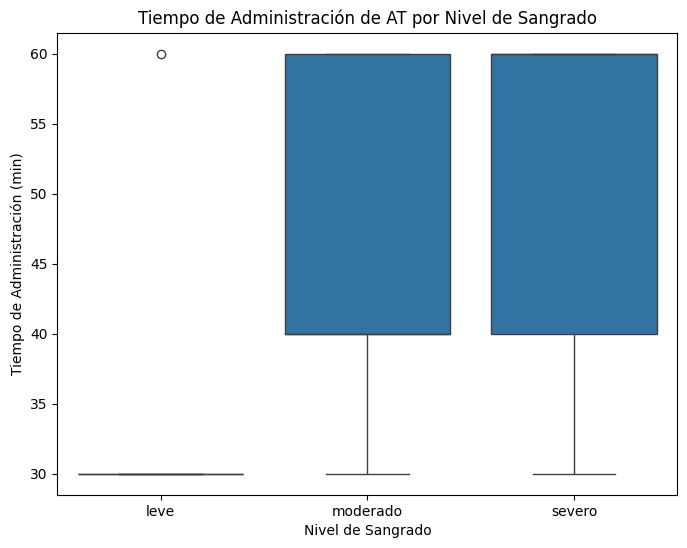

In [ ]:
# Importar librerías necesarias
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir el archivo de datos
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el archivo con codificación Latin-1
df = pd.read_csv(file_name, encoding='latin1')

# Limpiar los datos
df['tiempo_admin_min'] = pd.to_numeric(df['tiempo_admin_min'], errors='coerce')
df['nivel_sangrado'] = df['nivel_sangrado'].astype('category')

# Filtrar para incluir solo los pacientes que recibieron AT
df_at = df[df['uso_at'] == 1]

# Asegurarse de que las categorías existen en el filtro
niveles_sangrado = df_at['nivel_sangrado'].unique()
if 'leve' not in niveles_sangrado or 'moderado' not in niveles_sangrado or 'severo' not in niveles_sangrado:
    print("No hay suficientes niveles de sangrado en el grupo con AT para realizar la prueba ANOVA.")
else:
    # Preparar los datos para el ANOVA
    sangrado_leve = df_at[df_at['nivel_sangrado'] == 'leve']['tiempo_admin_min'].dropna()
    sangrado_moderado = df_at[df_at['nivel_sangrado'] == 'moderado']['tiempo_admin_min'].dropna()
    sangrado_severo = df_at[df_at['nivel_sangrado'] == 'severo']['tiempo_admin_min'].dropna()

    # Realizar la prueba ANOVA
    f_stat, p_valor_anova = stats.f_oneway(sangrado_leve, sangrado_moderado, sangrado_severo)
    print(f"Análisis de Varianza (ANOVA): p-valor = {p_valor_anova:.4f}")

    # Gráfico de caja (boxplot) para visualizar la distribución
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='nivel_sangrado', y='tiempo_admin_min', data=df_at, order=['leve', 'moderado', 'severo'])
    plt.title('Tiempo de Administración de AT por Nivel de Sangrado')
    plt.xlabel('Nivel de Sangrado')
    plt.ylabel('Tiempo de Administración (min)')
    plt.show()

Saving base hmemyn v_f1.csv to base hmemyn v_f1 (1).csv

--- Análisis de Correlación: Tiempo de Administración vs. Cantidad de Sangrado ---
Coeficiente de correlación de Pearson (r): 0.3576
p-valor: 0.0217


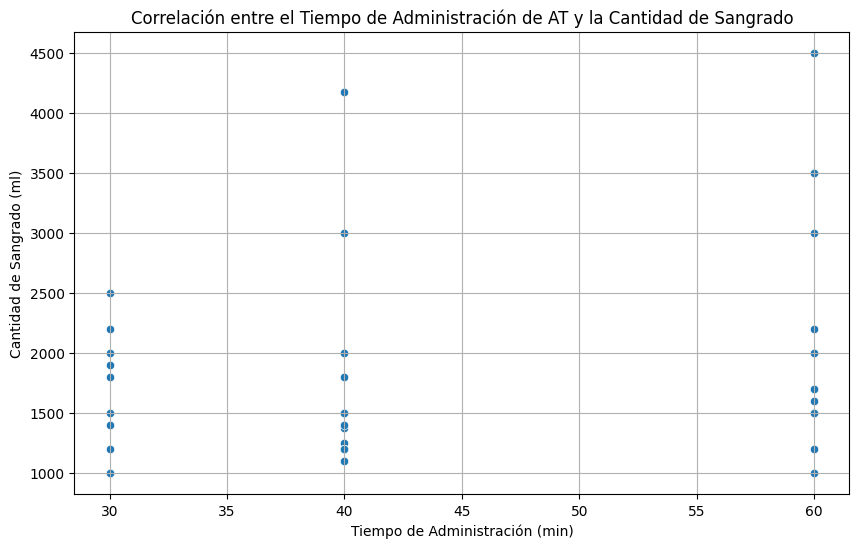

In [ ]:
# Importar librerías necesarias
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir el archivo de datos
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el archivo con codificación Latin-1
df = pd.read_csv(file_name, encoding='latin1')

# Limpiar y convertir datos a numéricos
df['tiempo_admin_min'] = pd.to_numeric(df['tiempo_admin_min'], errors='coerce')
df['sangrado_ml'] = pd.to_numeric(df['sangrado_ml'], errors='coerce')

# Filtrar para incluir solo los pacientes que recibieron AT
df_at = df[df['uso_at'] == 1].copy()

# Eliminar filas con valores nulos en las columnas de interés
df_at.dropna(subset=['tiempo_admin_min', 'sangrado_ml'], inplace=True)

if df_at.empty:
    print("No hay suficientes datos válidos en el grupo con AT para realizar el análisis de correlación.")
else:
    # 1. Realizar el análisis de correlación
    print("\n--- Análisis de Correlación: Tiempo de Administración vs. Cantidad de Sangrado ---")
    corr_coef, p_value = stats.pearsonr(df_at['tiempo_admin_min'], df_at['sangrado_ml'])

    print(f"Coeficiente de correlación de Pearson (r): {corr_coef:.4f}")
    print(f"p-valor: {p_value:.4f}")

    # 2. Crear un gráfico de dispersión para visualizar la correlación
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='tiempo_admin_min', y='sangrado_ml', data=df_at)
    plt.title('Correlación entre el Tiempo de Administración de AT y la Cantidad de Sangrado')
    plt.xlabel('Tiempo de Administración (min)')
    plt.ylabel('Cantidad de Sangrado (ml)')
    plt.grid(True)
    plt.show()

Saving base hmemyn v_f1.csv to base hmemyn v_f1 (2).csv

--- Análisis: Cantidad de Sangrado vs. Uso de AT ---
p-valor de la prueba t: 0.3561
Sangrado medio en el grupo CON AT: 1807.56 ml
Sangrado medio en el grupo SIN AT: 1642.86 ml


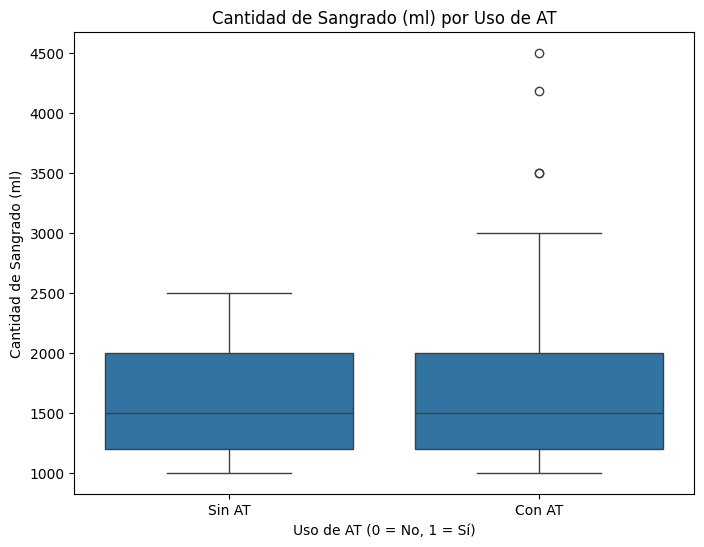

In [ ]:
# Importar librerías necesarias
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Subir el archivo de datos
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Cargar el archivo con codificación Latin-1
df = pd.read_csv(file_name, encoding='latin1')

# Limpiar y convertir datos a numéricos
df['sangrado_ml'] = pd.to_numeric(df['sangrado_ml'], errors='coerce')
df['uso_at'] = df['uso_at'].astype('category')

# Eliminar filas con valores nulos en la columna de sangrado
df.dropna(subset=['sangrado_ml', 'uso_at'], inplace=True)

# 1. Realizar la prueba t de Student
print("\n--- Análisis: Cantidad de Sangrado vs. Uso de AT ---")
sangrado_con_at = df[df['uso_at'] == 1]['sangrado_ml']
sangrado_sin_at = df[df['uso_at'] == 0]['sangrado_ml']

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = stats.ttest_ind(sangrado_con_at, sangrado_sin_at, equal_var=False)

print(f"p-valor de la prueba t: {p_value:.4f}")
print(f"Sangrado medio en el grupo CON AT: {sangrado_con_at.mean():.2f} ml")
print(f"Sangrado medio en el grupo SIN AT: {sangrado_sin_at.mean():.2f} ml")

# 2. Crear un gráfico de caja para visualizar la relación
plt.figure(figsize=(8, 6))
sns.boxplot(x='uso_at', y='sangrado_ml', data=df)
plt.title('Cantidad de Sangrado (ml) por Uso de AT')
plt.xlabel('Uso de AT (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Sangrado (ml)')
plt.xticks(ticks=[0, 1], labels=['Sin AT', 'Con AT'])
plt.show()